<a href="https://colab.research.google.com/github/microprediction/KerasGA/blob/master/colab_examples/keras_pygad_XOR_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install keras
!pip install pygad

# Genetic search for keras models
From [keras_pygad_XOR_classification.py](https://github.com/ahmedfgad/KerasGA/blob/8734848cbd0ca8fcc01f8c12b6920ecb397c3c51/keras_pygad_XOR_classification.py)

Generation = 1
Fitness    = 1.3799079180947027
Generation = 2
Fitness    = 1.4225740926559483
Generation = 3
Fitness    = 1.4225740926559483
Generation = 4
Fitness    = 1.435966923379198
Generation = 5
Fitness    = 1.435966923379198
Generation = 6
Fitness    = 1.435966923379198
Generation = 7
Fitness    = 1.6027880272592543
Generation = 8
Fitness    = 1.6027880272592543
Generation = 9
Fitness    = 1.6027880272592543
Generation = 10
Fitness    = 1.6027880272592543
Generation = 11
Fitness    = 1.7245081674538436
Generation = 12
Fitness    = 1.7545178704650521
Generation = 13
Fitness    = 1.773531651847513
Generation = 14
Fitness    = 1.773531651847513
Generation = 15
Fitness    = 1.8785561252806915
Generation = 16
Fitness    = 1.9658844479973967
Generation = 17
Fitness    = 2.043832829500369
Generation = 18
Fitness    = 2.043832829500369
Generation = 19
Fitness    = 2.043832829500369
Generation = 20
Fitness    = 2.13946359171974
Generation = 21
Fitness    = 2.13946359171974
Generation = 

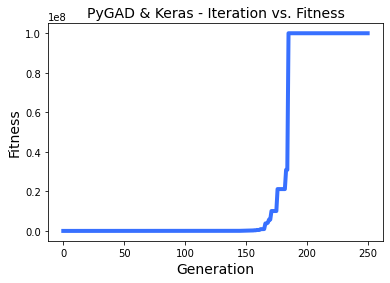

Fitness value of the best solution = 100000000.0
Index of the best solution : 0
Predictions : 
 [[1.0000000e+00 3.7350748e-08]
 [7.1598721e-12 1.0000000e+00]
 [2.4924706e-12 1.0000000e+00]
 [1.0000000e+00 4.0740966e-09]]
Binary Crossentropy :  0.0
Accuracy :  1.0


In [3]:
import tensorflow
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    predictions = pygad.kerasga.predict(model=model,
                                        solution=solution,
                                        data=data_inputs)
    
    bce = tensorflow.keras.losses.BinaryCrossentropy()
    solution_fitness = 1.0 / (bce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

# Build the keras model using the functional API.
input_layer  = tensorflow.keras.layers.Input(2)
dense_layer = tensorflow.keras.layers.Dense(4, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(2, activation="softmax")(dense_layer)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

# Create an instance of the pygad.kerasga.KerasGA class to build the initial population.
keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

# XOR problem inputs
data_inputs = numpy.array([[0.0, 0.0],
                           [0.0, 1.0],
                           [1.0, 0.0],
                           [1.0, 1.0]])
    
# XOR problem outputs
data_outputs = numpy.array([[1.0, 0.0],
                            [0.0, 1.0],
                            [0.0, 1.0],
                            [1.0, 0.0]])

# Prepare the PyGAD parameters. Check the documentation for more information: https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#pygad-ga-class
num_generations = 250 # Number of generations.
num_parents_mating = 5 # Number of solutions to be selected as parents in the mating pool.
initial_population = keras_ga.population_weights # Initial population of network weights.

# Create an instance of the pygad.GA class
ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

# Start the genetic algorithm evolution.
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

predictions = pygad.kerasga.predict(model=model,
                                    solution=solution,
                                    data=data_inputs)
print("Predictions : \n", predictions)

# Calculate the binary crossentropy for the trained model.
bce = tensorflow.keras.losses.BinaryCrossentropy()
print("Binary Crossentropy : ", bce(data_outputs, predictions).numpy())

# Calculate the classification accuracy for the trained model.
ba = tensorflow.keras.metrics.BinaryAccuracy()
ba.update_state(data_outputs, predictions)
accuracy = ba.result().numpy()
print("Accuracy : ", accuracy)

# model.compile(optimizer="Adam", loss="mse", metrics=["mae"])

# _ = model.fit(x, y, verbose=0)
# r = model.predict(data_inputs)